In [1]:
!pip install pandas_datareader

In [2]:
!pip install --upgrade numpy tensorflow


ERROR: THESE PACKAGES DO NOT MATCH THE HASHES FROM THE REQUIREMENTS FILE. If you have updated the package versions, please update the hashes. Otherwise, examine the package contents carefully; someone may have tampered with them.
    unknown package:
        Expected sha256 af380d326e146f2d184a940ccf8350e9b6dc06a0530bfaa3a557b73819c4017b
             Got        5884a0524f42a016c4c8a7516b70c267b6f83eebb8cb3cfc0e6a4b4b24e47c00




  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/6d/1e/be3b9f3073da2f8c7fa361fcdc231b548266b0781029fdbaf75eeab997fd/numpy-2.2.1-cp311-cp311-win_amd64.whl.metadata
  Using cached numpy-2.2.1-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/cf/24/271e77c22724f370c24c705f394b8035b4d27e4c2c6339f3f45ab9b8258e/tensorflow-2.18.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow-2.18.0-cp311-cp311-win_amd64.whl.metadata (3.3 kB)
  Obtaining dependency information for tensorflow-intel==2.18.0 from https://files.pythonhosted.org/packages/76/ad/fa6c508a15ff79cb5409294c293388e0999b7d480f84b65e4287277434fe/tensorflow_intel-2.18.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow_intel-2.18.0-cp311-cp311-win_amd64.whl.metadata (4.9 kB)
  Obtaining dependency information for flatbuffers>=24.3.25 from https://files.pythonhosted.org/packages/fb/b4/31c4

In [3]:
!pip install yfinance

In [4]:
!pip install pandas_ta

In [5]:
from statsmodels.regression.rolling import RollingOLS
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf
import pandas_ta
import warnings
warnings.filterwarnings('ignore')

sp500 = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]

sp500['Symbol'] = sp500['Symbol'].str.replace('.', '-')

symbols_list = sp500['Symbol'].unique().tolist()

end_date = '2025-01-01'

# start_date = pd.to_datetime(end_date)-pd.DateOffset(365*8)

# df = yf.download(tickers=symbols_list,
#                  start=start_date,
#                  end=end_date).stack()

# df.index.names = ['date', 'ticker']

# df.columns = df.columns.str.lower()

# df

In [6]:
end_date = '2025-01-01'

start_date = pd.to_datetime(end_date)-pd.DateOffset(365*8)

df1 = yf.download(tickers=symbols_list,
                 start=start_date,
                 end=end_date, auto_adjust = False).stack()

df1.index.names = ['date', 'ticker']

df1.columns = df1.columns.str.lower()

df1

[*********************100%***********************]  503 of 503 completed

1 Failed download:
['NUE']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2017-01-03 00:00:00 -> 2025-01-01)')


Price               adj close       close        high         low        open  \
date       ticker                                                               
2017-01-03 A        43.743866   46.490002   46.750000   45.740002   45.930000   
           AAPL     26.891956   29.037500   29.082500   28.690001   28.950001   
           ABBV     44.265285   62.410000   63.029999   61.939999   62.919998   
           ABT      33.788071   39.049999   39.080002   38.340000   38.630001   
           ACGL     27.224224   28.629999   29.143333   28.506666   28.943333   
...                       ...         ...         ...         ...         ...   
2024-12-31 XYL     116.019997  116.019997  117.110001  115.570000  116.779999   
           YUM     134.160004  134.160004  134.789993  133.250000  134.089996   
           ZBH     105.629997  105.629997  106.500000  104.959999  105.910004   
           ZBRA    386.220001  386.220001  387.410004  381.750000  383.420013   
           ZTS     162.929993  162.929993  163.750000  161.869995  162.899994   

Price                   volume  
date       ticker               
2017-01-03 A         1739600.0  
           AAPL    115127600.0  
           ABBV      9328200.0  
           ABT       9677300.0  
           ACGL       942900.0  
...                        ...  
2024-12-31 XYL        641600.0  
           YUM       1217100.0  
           ZBH        683300.0  
           ZBRA       327900.0  
           ZTS       1327400.0  

[990248 rows x 6 columns]

In [7]:
consistent_tickers = df1.index.get_level_values('ticker').unique()

# Filter tickers that appear on all dates
dates_per_ticker = df1.groupby('ticker').size()
total_dates = len(df1.index.get_level_values('date').unique())
consistent_tickers = dates_per_ticker[dates_per_ticker == total_dates].index

# Step 2: Filter the DataFrame to include only consistent tickers
df_filtered = df1.loc[df1.index.get_level_values('ticker').isin(consistent_tickers)]

# Display the filtered DataFrame
print(df_filtered)

Price               adj close       close        high         low        open  \
date       ticker                                                               
2017-01-03 A        43.743866   46.490002   46.750000   45.740002   45.930000   
           AAPL     26.891956   29.037500   29.082500   28.690001   28.950001   
           ABBV     44.265285   62.410000   63.029999   61.939999   62.919998   
           ABT      33.788071   39.049999   39.080002   38.340000   38.630001   
           ACGL     27.224224   28.629999   29.143333   28.506666   28.943333   
...                       ...         ...         ...         ...         ...   
2024-12-31 XYL     116.019997  116.019997  117.110001  115.570000  116.779999   
           YUM     134.160004  134.160004  134.789993  133.250000  134.089996   
           ZBH     105.629997  105.629997  106.500000  104.959999  105.910004   
           ZBRA    386.220001  386.220001  387.410004  381.750000  383.420013   
           ZTS     162.92999

In [8]:
df_filtered

Price               adj close       close        high         low        open  \
date       ticker                                                               
2017-01-03 A        43.743866   46.490002   46.750000   45.740002   45.930000   
           AAPL     26.891956   29.037500   29.082500   28.690001   28.950001   
           ABBV     44.265285   62.410000   63.029999   61.939999   62.919998   
           ABT      33.788071   39.049999   39.080002   38.340000   38.630001   
           ACGL     27.224224   28.629999   29.143333   28.506666   28.943333   
...                       ...         ...         ...         ...         ...   
2024-12-31 XYL     116.019997  116.019997  117.110001  115.570000  116.779999   
           YUM     134.160004  134.160004  134.789993  133.250000  134.089996   
           ZBH     105.629997  105.629997  106.500000  104.959999  105.910004   
           ZBRA    386.220001  386.220001  387.410004  381.750000  383.420013   
           ZTS     162.929993  162.929993  163.750000  161.869995  162.899994   

Price                   volume  
date       ticker               
2017-01-03 A         1739600.0  
           AAPL    115127600.0  
           ABBV      9328200.0  
           ABT       9677300.0  
           ACGL       942900.0  
...                        ...  
2024-12-31 XYL        641600.0  
           YUM       1217100.0  
           ZBH        683300.0  
           ZBRA       327900.0  
           ZTS       1327400.0  

[965760 rows x 6 columns]

In [9]:
df = df_filtered
df

Price               adj close       close        high         low        open  \
date       ticker                                                               
2017-01-03 A        43.743866   46.490002   46.750000   45.740002   45.930000   
           AAPL     26.891956   29.037500   29.082500   28.690001   28.950001   
           ABBV     44.265285   62.410000   63.029999   61.939999   62.919998   
           ABT      33.788071   39.049999   39.080002   38.340000   38.630001   
           ACGL     27.224224   28.629999   29.143333   28.506666   28.943333   
...                       ...         ...         ...         ...         ...   
2024-12-31 XYL     116.019997  116.019997  117.110001  115.570000  116.779999   
           YUM     134.160004  134.160004  134.789993  133.250000  134.089996   
           ZBH     105.629997  105.629997  106.500000  104.959999  105.910004   
           ZBRA    386.220001  386.220001  387.410004  381.750000  383.420013   
           ZTS     162.929993  162.929993  163.750000  161.869995  162.899994   

Price                   volume  
date       ticker               
2017-01-03 A         1739600.0  
           AAPL    115127600.0  
           ABBV      9328200.0  
           ABT       9677300.0  
           ACGL       942900.0  
...                        ...  
2024-12-31 XYL        641600.0  
           YUM       1217100.0  
           ZBH        683300.0  
           ZBRA       327900.0  
           ZTS       1327400.0  

[965760 rows x 6 columns]

In [10]:
print(df_filtered.groupby('date').size())


date
2017-01-03    480
2017-01-04    480
2017-01-05    480
2017-01-06    480
2017-01-09    480
             ... 
2024-12-24    480
2024-12-26    480
2024-12-27    480
2024-12-30    480
2024-12-31    480
Length: 2012, dtype: int64


## Calculation of Technical Indicators

1. Garman-Klass Volatility
2. RSI
3. Bollinger Bands
4. ATR
5. MACD
6. Dollar Volume

In [11]:
df['garman_klass_vol'] = ((np.log(df['high'])-np.log(df['low']))**2)/2-(2*np.log(2)-1)*((np.log(df['adj close'])-np.log(df['open']))**2)

df['rsi'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.rsi(close=x, length=20))

df['bb_low'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:,0])

df['bb_mid'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:,1])

df['bb_high'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:,2])

def compute_atr(stock_data):
    atr = pandas_ta.atr(high=stock_data['high'],
                        low=stock_data['low'],
                        close=stock_data['close'],
                        length=14)
    return atr.sub(atr.mean()).div(atr.std())

df['atr'] = df.groupby(level=1, group_keys=False).apply(compute_atr)

def compute_macd(close):
    macd = pandas_ta.macd(close=close, length=20).iloc[:,0]
    return macd.sub(macd.mean()).div(macd.std())

df['macd'] = df.groupby(level=1, group_keys=False)['adj close'].apply(compute_macd)

df['dollar_volume'] = (df['adj close']*df['volume'])/1e6

df

Price               adj close       close        high         low        open  \
date       ticker                                                               
2017-01-03 A        43.743866   46.490002   46.750000   45.740002   45.930000   
           AAPL     26.891956   29.037500   29.082500   28.690001   28.950001   
           ABBV     44.265285   62.410000   63.029999   61.939999   62.919998   
           ABT      33.788071   39.049999   39.080002   38.340000   38.630001   
           ACGL     27.224224   28.629999   29.143333   28.506666   28.943333   
...                       ...         ...         ...         ...         ...   
2024-12-31 XYL     116.019997  116.019997  117.110001  115.570000  116.779999   
           YUM     134.160004  134.160004  134.789993  133.250000  134.089996   
           ZBH     105.629997  105.629997  106.500000  104.959999  105.910004   
           ZBRA    386.220001  386.220001  387.410004  381.750000  383.420013   
           ZTS     162.929993  162.929993  163.750000  161.869995  162.899994   

Price                   volume  garman_klass_vol        rsi    bb_low  \
date       ticker                                                       
2017-01-03 A         1739600.0         -0.000680        NaN       NaN   
           AAPL    115127600.0         -0.002008        NaN       NaN   
           ABBV      9328200.0         -0.047620        NaN       NaN   
           ABT       9677300.0         -0.006745        NaN       NaN   
           ACGL       942900.0         -0.001204        NaN       NaN   
...                        ...               ...        ...       ...   
2024-12-31 XYL        641600.0          0.000071  34.976429  4.732476   
           YUM       1217100.0          0.000066  47.898465  4.881012   
           ZBH        683300.0          0.000103  44.205732  4.657774   
           ZBRA       327900.0          0.000088  46.600495  5.942514   
           ZTS       1327400.0          0.000067  34.077573  5.074450   

Price                bb_mid   bb_high       atr      macd  dollar_volume  
date       ticker                                                         
2017-01-03 A            NaN       NaN       NaN       NaN      76.096829  
           AAPL         NaN       NaN       NaN       NaN    3096.006392  
           ABBV         NaN       NaN       NaN       NaN     412.915436  
           ABT          NaN       NaN       NaN       NaN     326.977296  
           ACGL         NaN       NaN       NaN       NaN      25.669721  
...                     ...       ...       ...       ...            ...  
2024-12-31 XYL     4.806122  4.879769  0.377737 -1.617869      74.438430  
           YUM     4.917930  4.954848  0.509877 -0.523006     163.286140  
           ZBH     4.684596  4.711418 -0.685694 -0.326529      72.176977  
           ZBRA    5.989551  6.036588  0.027840 -0.391524     126.641538  
           ZTS     5.146492  5.218534  0.271221 -1.784608     216.273272  

[965760 rows x 14 columns]

In [12]:
df = df.sort_index(level=['ticker', 'date'])

# Create the 'future_price' column by shifting values up by 5 days for each ticker
df['future_price'] = df.groupby('ticker')['close'].shift(-5)

In [13]:
df.sort_index(level = ['date', 'ticker'], inplace = True)


In [14]:
df.head(20)

Price               adj close       close        high         low        open  \
date       ticker                                                               
2017-01-03 A        43.743866   46.490002   46.750000   45.740002   45.930000   
           AAPL     26.891956   29.037500   29.082500   28.690001   28.950001   
           ABBV     44.265285   62.410000   63.029999   61.939999   62.919998   
           ABT      33.788071   39.049999   39.080002   38.340000   38.630001   
           ACGL     27.224224   28.629999   29.143333   28.506666   28.943333   
           ACN     102.893761  116.459999  117.809998  115.820000  117.379997   
           ADBE    103.480003  103.480003  104.029999  102.809998  103.430000   
           ADI      62.182320   72.510002   74.129997   72.089996   72.599998   
           ADM      36.741150   46.189999   46.250000   45.549999   45.689999   
           ADP      87.400902  103.500000  103.580002  102.309998  102.379997   
           ADSK     76.180000   76.180000   77.099998   74.500000   74.610001   
           AEE      41.624096   52.380001   52.590000   51.930000   52.590000   
           AEP      47.251740   62.759998   63.029999   62.349998   63.009998   
           AES       8.862624   11.660000   11.700000   11.550000   11.670000   
           AFL      28.895706   34.884998   35.165001   34.660000   35.044998   
           AIG      52.940777   65.120003   66.010002   64.690002   65.949997   
           AIZ      80.258781   94.120003   94.120003   92.720001   93.639999   
           AJG      45.847073   52.240002   52.330002   51.799999   52.000000   
           AKAM     67.570000   67.570000   68.370003   67.110001   67.269997   
           ALB      79.611473   88.050003   88.120003   86.980003   87.150002   

Price                   volume  garman_klass_vol  rsi  bb_low  bb_mid  \
date       ticker                                                       
2017-01-03 A         1739600.0         -0.000680  NaN     NaN     NaN   
           AAPL    115127600.0         -0.002008  NaN     NaN     NaN   
           ABBV      9328200.0         -0.047620  NaN     NaN     NaN   
           ABT       9677300.0         -0.006745  NaN     NaN     NaN   
           ACGL       942900.0         -0.001204  NaN     NaN     NaN   
           ACN       2351600.0         -0.006557  NaN     NaN     NaN   
           ADBE      2277400.0          0.000069  NaN     NaN     NaN   
           ADI       2687200.0         -0.008879  NaN     NaN     NaN   
           ADM       3614900.0         -0.018239  NaN     NaN     NaN   
           ADP       2227400.0         -0.009590  NaN     NaN     NaN   
           ADSK      1896300.0          0.000421  NaN     NaN     NaN   
           AEE       1107200.0         -0.021044  NaN     NaN     NaN   
           AEP       1943800.0         -0.031938  NaN     NaN     NaN   
           AES       5020400.0         -0.029168  NaN     NaN     NaN   
           AFL       4649400.0         -0.014275  NaN     NaN     NaN   
           AIG       7321900.0         -0.018446  NaN     NaN     NaN   
           AIZ        429200.0         -0.009073  NaN     NaN     NaN   
           AJG       1058600.0         -0.006074  NaN     NaN     NaN   
           AKAM      1077400.0          0.000165  NaN     NaN     NaN   
           ALB        975600.0         -0.003077  NaN     NaN     NaN   

Price              bb_high  atr  macd  dollar_volume  future_price  
date       ticker                                                   
2017-01-03 A           NaN  NaN   NaN      76.096829     48.099998  
           AAPL        NaN  NaN   NaN    3096.006392     29.777500  
           ABBV        NaN  NaN   NaN     412.915436     64.070000  
           ABT         NaN  NaN   NaN     326.977296     41.290001  
           ACGL        NaN  NaN   NaN      25.669721     28.770000  
           ACN         NaN  NaN   NaN     241.964968    115.059998  
           ADBE        NaN  NaN   NaN     235.665360    10

In [15]:

df['target'] = (df['future_price'] > df['adj close'] * 1.05).astype(int) #Assuming a 5% inflation rate

In [16]:
df

Price               adj close       close        high         low        open  \
date       ticker                                                               
2017-01-03 A        43.743866   46.490002   46.750000   45.740002   45.930000   
           AAPL     26.891956   29.037500   29.082500   28.690001   28.950001   
           ABBV     44.265285   62.410000   63.029999   61.939999   62.919998   
           ABT      33.788071   39.049999   39.080002   38.340000   38.630001   
           ACGL     27.224224   28.629999   29.143333   28.506666   28.943333   
...                       ...         ...         ...         ...         ...   
2024-12-31 XYL     116.019997  116.019997  117.110001  115.570000  116.779999   
           YUM     134.160004  134.160004  134.789993  133.250000  134.089996   
           ZBH     105.629997  105.629997  106.500000  104.959999  105.910004   
           ZBRA    386.220001  386.220001  387.410004  381.750000  383.420013   
           ZTS     162.929993  162.929993  163.750000  161.869995  162.899994   

Price                   volume  garman_klass_vol        rsi    bb_low  \
date       ticker                                                       
2017-01-03 A         1739600.0         -0.000680        NaN       NaN   
           AAPL    115127600.0         -0.002008        NaN       NaN   
           ABBV      9328200.0         -0.047620        NaN       NaN   
           ABT       9677300.0         -0.006745        NaN       NaN   
           ACGL       942900.0         -0.001204        NaN       NaN   
...                        ...               ...        ...       ...   
2024-12-31 XYL        641600.0          0.000071  34.976429  4.732476   
           YUM       1217100.0          0.000066  47.898465  4.881012   
           ZBH        683300.0          0.000103  44.205732  4.657774   
           ZBRA       327900.0          0.000088  46.600495  5.942514   
           ZTS       1327400.0          0.000067  34.077573  5.074450   

Price                bb_mid   bb_high       atr      macd  dollar_volume  \
date       ticker                                                          
2017-01-03 A            NaN       NaN       NaN       NaN      76.096829   
           AAPL         NaN       NaN       NaN       NaN    3096.006392   
           ABBV         NaN       NaN       NaN       NaN     412.915436   
           ABT          NaN       NaN       NaN       NaN     326.977296   
           ACGL         NaN       NaN       NaN       NaN      25.669721   
...                     ...       ...       ...       ...            ...   
2024-12-31 XYL     4.806122  4.879769  0.377737 -1.617869      74.438430   
           YUM     4.917930  4.954848  0.509877 -0.523006     163.286140   
           ZBH     4.684596  4.711418 -0.685694 -0.326529      72.176977   
           ZBRA    5.989551  6.036588  0.027840 -0.391524     126.641538   
           ZTS     5.146492  5.218534  0.271221 -1.784608     216.273272   

Price              future_price  target  
date       ticker                        
2017-01-03 A          48.099998       1  
           AAPL       29.777500       1  
           ABBV       64.070000       1  
           ABT        41.290001       1  
           ACGL       28.770000       1  
...                         ...     ...  
2024-12-31 XYL              NaN       0  
           YUM              NaN       0  
           ZBH              NaN       0  
           ZBRA             NaN       0  
           ZTS              NaN       0  

[965760 rows x 16 columns]

In [17]:
df.head(20)

Price               adj close       close        high         low        open  \
date       ticker                                                               
2017-01-03 A        43.743866   46.490002   46.750000   45.740002   45.930000   
           AAPL     26.891956   29.037500   29.082500   28.690001   28.950001   
           ABBV     44.265285   62.410000   63.029999   61.939999   62.919998   
           ABT      33.788071   39.049999   39.080002   38.340000   38.630001   
           ACGL     27.224224   28.629999   29.143333   28.506666   28.943333   
           ACN     102.893761  116.459999  117.809998  115.820000  117.379997   
           ADBE    103.480003  103.480003  104.029999  102.809998  103.430000   
           ADI      62.182320   72.510002   74.129997   72.089996   72.599998   
           ADM      36.741150   46.189999   46.250000   45.549999   45.689999   
           ADP      87.400902  103.500000  103.580002  102.309998  102.379997   
           ADSK     76.180000   76.180000   77.099998   74.500000   74.610001   
           AEE      41.624096   52.380001   52.590000   51.930000   52.590000   
           AEP      47.251740   62.759998   63.029999   62.349998   63.009998   
           AES       8.862624   11.660000   11.700000   11.550000   11.670000   
           AFL      28.895706   34.884998   35.165001   34.660000   35.044998   
           AIG      52.940777   65.120003   66.010002   64.690002   65.949997   
           AIZ      80.258781   94.120003   94.120003   92.720001   93.639999   
           AJG      45.847073   52.240002   52.330002   51.799999   52.000000   
           AKAM     67.570000   67.570000   68.370003   67.110001   67.269997   
           ALB      79.611473   88.050003   88.120003   86.980003   87.150002   

Price                   volume  garman_klass_vol  rsi  bb_low  bb_mid  \
date       ticker                                                       
2017-01-03 A         1739600.0         -0.000680  NaN     NaN     NaN   
           AAPL    115127600.0         -0.002008  NaN     NaN     NaN   
           ABBV      9328200.0         -0.047620  NaN     NaN     NaN   
           ABT       9677300.0         -0.006745  NaN     NaN     NaN   
           ACGL       942900.0         -0.001204  NaN     NaN     NaN   
           ACN       2351600.0         -0.006557  NaN     NaN     NaN   
           ADBE      2277400.0          0.000069  NaN     NaN     NaN   
           ADI       2687200.0         -0.008879  NaN     NaN     NaN   
           ADM       3614900.0         -0.018239  NaN     NaN     NaN   
           ADP       2227400.0         -0.009590  NaN     NaN     NaN   
           ADSK      1896300.0          0.000421  NaN     NaN     NaN   
           AEE       1107200.0         -0.021044  NaN     NaN     NaN   
           AEP       1943800.0         -0.031938  NaN     NaN     NaN   
           AES       5020400.0         -0.029168  NaN     NaN     NaN   
           AFL       4649400.0         -0.014275  NaN     NaN     NaN   
           AIG       7321900.0         -0.018446  NaN     NaN     NaN   
           AIZ        429200.0         -0.009073  NaN     NaN     NaN   
           AJG       1058600.0         -0.006074  NaN     NaN     NaN   
           AKAM      1077400.0          0.000165  NaN     NaN     NaN   
           ALB        975600.0         -0.003077  NaN     NaN     NaN   

Price              bb_high  atr  macd  dollar_volume  future_price  target  
date       ticker                                                           
2017-01-03 A           NaN  NaN   NaN      76.096829     48.099998       1  
           AAPL        NaN  NaN   NaN    3096.006392     29.777500       1  
           ABBV        NaN  NaN   NaN     412.915436     64.070000       1  
           ABT         NaN  NaN   NaN     326.977296     41.290001       1  
           ACGL        NaN  NaN   NaN      25.669721     28.770000       1  
           ACN         NaN  NaN   NaN     241.964968    115.059998     

In [18]:
df.drop(['future_price'], axis = 1, inplace = True)

In [19]:
df.isnull().sum()

Price
adj close               0
close                   0
high                    0
low                     0
open                    0
volume                  0
garman_klass_vol        0
rsi                  9616
bb_low               9120
bb_mid               9120
bb_high              9120
atr                  6720
macd                12000
dollar_volume           0
target                  0
dtype: int64

In [20]:
df.fillna(method = 'bfill', inplace = True)

In [21]:
df.isnull().sum()

Price
adj close           0
close               0
high                0
low                 0
open                0
volume              0
garman_klass_vol    0
rsi                 0
bb_low              0
bb_mid              0
bb_high             0
atr                 0
macd                0
dollar_volume       0
target              0
dtype: int64

In [22]:
df.columns

Index(['adj close', 'close', 'high', 'low', 'open', 'volume',
       'garman_klass_vol', 'rsi', 'bb_low', 'bb_mid', 'bb_high', 'atr', 'macd',
       'dollar_volume', 'target'],
      dtype='object', name='Price')

<Axes: xlabel='Price', ylabel='Price'>

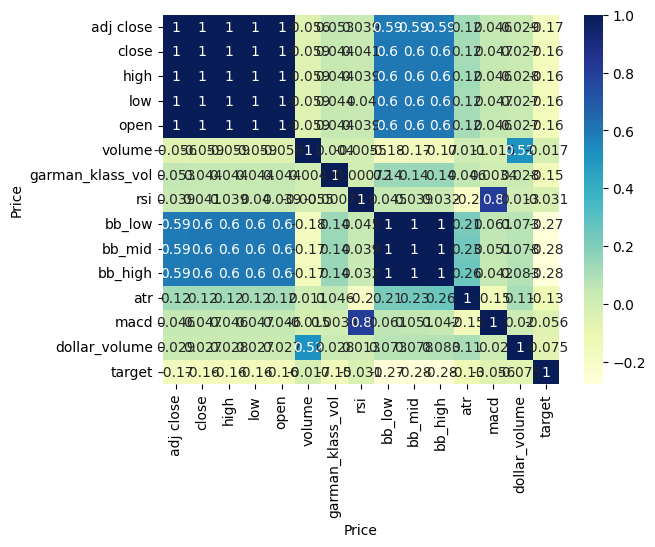

In [23]:
import seaborn as sns
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

In [24]:
X = df[['adj close', 'close', 'high', 'low', 'open', 'volume', 'garman_klass_vol', 'rsi', 'bb_low', 'bb_mid', 'bb_high', 'atr', 'macd', 'dollar_volume']]
y = df['target']

In [25]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.callbacks import EarlyStopping
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


In [27]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [28]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.3),  # Regularization
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [29]:

early_stopping = EarlyStopping(monitor = 'accuracy', patience = 8, restore_best_weights = True)
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1, callbacks = [early_stopping])


Epoch 1/50
19316/19316 [==============================] - 27s 1ms/step - loss: 0.3987 - accuracy: 0.8213 - val_loss: 0.3824 - val_accuracy: 0.8306
Epoch 2/50
19316/19316 [==============================] - 26s 1ms/step - loss: 0.3851 - accuracy: 0.8290 - val_loss: 0.3798 - val_accuracy: 0.8305
Epoch 3/50
19316/19316 [==============================] - 26s 1ms/step - loss: 0.3827 - accuracy: 0.8303 - val_loss: 0.3772 - val_accuracy: 0.8323
Epoch 4/50
19316/19316 [==============================] - 26s 1ms/step - loss: 0.3811 - accuracy: 0.8306 - val_loss: 0.3775 - val_accuracy: 0.8312
Epoch 5/50
19316/19316 [==============================] - 27s 1ms/step - loss: 0.3804 - accuracy: 0.8311 - val_loss: 0.3742 - val_accuracy: 0.8326
Epoch 6/50
19316/19316 [==============================] - 27s 1ms/step - loss: 0.3794 - accuracy: 0.8314 - val_loss: 0.3766 - val_accuracy: 0.8314
Epoch 7/50
19316/19316 [==============================] - 28s 1ms/step - loss: 0.3784 - accuracy: 0.8319 - val_loss: 0

In [30]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

6036/6036 [==============================] - 5s 701us/step


In [31]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8354094184890656
              precision    recall  f1-score   support

           0       0.78      0.87      0.82     84799
           1       0.89      0.81      0.85    108353

    accuracy                           0.84    193152
   macro avg       0.83      0.84      0.83    193152
weighted avg       0.84      0.84      0.84    193152



In [36]:
def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    """Train and evaluate a model."""
    early_stopping = EarlyStopping(monitor='accuracy', patience=4, restore_best_weights=True)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2, verbose=1, callbacks=[early_stopping])
    y_pred_prob = model.predict(X_test)
    y_pred = (y_pred_prob > 0.5).astype(int)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    return model

In [33]:
cnn_model = tf.keras.Sequential([
    tf.keras.layers.Reshape((X_train.shape[1], 1), input_shape=(X_train.shape[1],)),
    tf.keras.layers.Conv1D(32, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(64, kernel_size=3, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

cnn_model = train_and_evaluate(cnn_model, X_train, y_train, X_test, y_test)

Epoch 1/15
19316/19316 [==============================] - 37s 2ms/step - loss: 0.4191 - accuracy: 0.8069 - val_loss: 0.3905 - val_accuracy: 0.8267
Epoch 2/15
19316/19316 [==============================] - 36s 2ms/step - loss: 0.3879 - accuracy: 0.8279 - val_loss: 0.3834 - val_accuracy: 0.8283
Epoch 3/15
19316/19316 [==============================] - 36s 2ms/step - loss: 0.3799 - accuracy: 0.8308 - val_loss: 0.3801 - val_accuracy: 0.8289
Epoch 4/15
19316/19316 [==============================] - 35s 2ms/step - loss: 0.3765 - accuracy: 0.8329 - val_loss: 0.3751 - val_accuracy: 0.8320
Epoch 5/15
19316/19316 [==============================] - 35s 2ms/step - loss: 0.3744 - accuracy: 0.8341 - val_loss: 0.3737 - val_accuracy: 0.8318
Epoch 6/15
19316/19316 [==============================] - 36s 2ms/step - loss: 0.3727 - accuracy: 0.8351 - val_loss: 0.3708 - val_accuracy: 0.8355
Epoch 7/15
19316/19316 [==============================] - 37s 2ms/step - loss: 0.3714 - accuracy: 0.8360 - val_loss: 0

In [37]:
lstm_model = tf.keras.Sequential([
    tf.keras.layers.Reshape((X_train.shape[1], 1), input_shape=(X_train.shape[1],)),  # Reshape for LSTM
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

final_lstm_model = train_and_evaluate(lstm_model, X_train, y_train, X_test, y_test)

Epoch 1/30
19316/19316 [==============================] - 201s 10ms/step - loss: 0.4507 - accuracy: 0.7808 - val_loss: 0.4014 - val_accuracy: 0.8185
Epoch 2/30
19316/19316 [==============================] - 200s 10ms/step - loss: 0.3934 - accuracy: 0.8251 - val_loss: 0.3941 - val_accuracy: 0.8236
Epoch 3/30
19316/19316 [==============================] - 202s 10ms/step - loss: 0.3869 - accuracy: 0.8289 - val_loss: 0.3881 - val_accuracy: 0.8278
Epoch 4/30
19316/19316 [==============================] - 216s 11ms/step - loss: 0.3837 - accuracy: 0.8303 - val_loss: 0.3802 - val_accuracy: 0.8301
Epoch 5/30
19316/19316 [==============================] - 211s 11ms/step - loss: 0.3815 - accuracy: 0.8311 - val_loss: 0.3804 - val_accuracy: 0.8299
Epoch 6/30
19316/19316 [==============================] - 194s 10ms/step - loss: 0.3797 - accuracy: 0.8318 - val_loss: 0.3772 - val_accuracy: 0.8316
Epoch 7/30
19316/19316 [==============================] - 201s 10ms/step - loss: 0.3778 - accuracy: 0.8327

In [38]:
final_lstm_model.save('lstm_trading_model.h5')

In [35]:
from tensorflow.keras.layers import Input, Reshape, MultiHeadAttention, LSTM, Dense, Dropout
from tensorflow.keras.models import Model

input_layer = Input(shape=(X_train.shape[1],))  # Input shape (batch_size, features)
x = Reshape((X_train.shape[1], 1))(input_layer)  # Reshape for attention (batch_size, time_steps, features)

# Transformer (MultiHeadAttention) layer
attention_output = MultiHeadAttention(num_heads=4, key_dim=64)(x, x, x)  # Query, Key, Value all are 'x'

# LSTM layers
lstm_output = LSTM(64, return_sequences=True)(attention_output)
lstm_output = LSTM(32)(lstm_output)

# Dense layer
dense_output = Dense(64, activation='relu')(lstm_output)

# Dropout layer for regularization
dropout_output = Dropout(0.3)(dense_output)

# Output layer (Binary classification)
output_layer = Dense(1, activation='sigmoid')(dropout_output)

# Creating the model
combined_model = Model(inputs=input_layer, outputs=output_layer)

print("\nTransformer + LSTM Model Results:")
train_and_evaluate(combined_model, X_train, y_train, X_test, y_test)


Transformer + LSTM Model Results:
Epoch 1/15
  391/19316 [..............................] - ETA: 3:56 - loss: 0.6399 - accuracy: 0.6437

KeyboardInterrupt: 

In [2]:
import tensorflow as tf
tf.__version__

'2.18.0'

In [3]:
!pip uninstall tensorflow
!pip install tensorflow==2.17.1

^C
  Using cached tensorflow-2.17.1-cp311-cp311-win_amd64.whl (7.5 kB)
  Using cached tensorflow_intel-2.17.1-cp311-cp311-win_amd64.whl (382.3 MB)
  Using cached protobuf-4.25.6-cp310-abi3-win_amd64.whl (413 kB)
  Using cached tensorboard-2.17.1-py3-none-any.whl (5.5 MB)
  Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl (15.8 MB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.3
    Uninstalling protobuf-5.29.3:
      Successfully uninstalled protobuf-5.29.3


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'D:\\Datahackproj\\Trading-Project\\venv\\Lib\\site-packages\\google\\~upb\\_message.pyd'
Check the permissions.


[notice] A new release of pip is available: 23.1.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import LSTM
model = tf.keras.Sequential([
    tf.keras.layers.Reshape((13, 1), input_shape=(13,)),  # Reshape for LSTM
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.load_weights('D:\\Datahackproj\\Trading-Project\\flask-trading-app\\Research\\lstm_trading_model.h5')
input_shape = model.input_shape
print("Model Input Shape:", input_shape)

d:\Datahackproj\Trading-Project\venv\Lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model Input Shape: (None, 13)
